For writing the narrative and exporting data.

In [46]:
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt

S_TOTALS = pickle.load(open('../data/S_Sex_Graduates.p', 'rb'))
E_TOTALS = pickle.load(open('../data/E_Sex_Graduates.p', 'rb'))
D_TOTALS = pickle.load(open('../data/SE-Detailed_Sex.p', 'rb'))

years = sorted(S_TOTALS.keys())
institutions = sorted(S_TOTALS[ max(years) ].keys())
fields = {
    'Science': set(),
    'Engineering': set()
}
for year in years:
    inst_stats = D_TOTALS[year]['Columbia University in the City of New York']
    for seh in inst_stats.keys():
        for field in inst_stats[seh].keys():
            fields[seh].add(field)
fields['Science'] = sorted(fields['Science'])
fields['Engineering'] = sorted(fields['Engineering'])

print(f'Data set describes years {min(years)} - {max(years)} for {len(institutions)} institutions and {len(fields["Science"]) + len(fields["Engineering"])} fields.')                                                                                                                   

Data set describes years 1994 - 2016 for 11 institutions and 39 fields.


In [48]:
def get_total_proportions(totals, inst='Columbia University in the City of New York'):
    props = []
    for year in years:
        inst_data = totals[year].get(inst, None)
        if inst_data is None:
            props.append(None)
        else:
            props.append(inst_data['Female'] / inst_data['Total for selected values'])
    return props

def plot_peer_proportions(ax, totals, title, highlight='Columbia University in the City of New York',
                          peer_color='lightgray', highlight_color='black'):
    for inst in institutions:
        if inst != highlight:
            ax.plot(years, get_total_proportions(totals, inst), color=peer_color)
    ax.plot(years, get_total_proportions(totals, highlight), color=highlight_color, linewidth=3)
    
    ax.plot(years, [0.5 for _ in years], color='lightgray', linestyle='--')
    ax.set_ylim(bottom=0, top=1)
    
    ax.set_title(title)
    ax.set_ylabel('Proportion female')
    ax.grid()

def get_proportions(seh, field, inst='Columbia University in the City of New York'):
    proportions = []
    for year in years:
        field_stats = D_TOTALS[year][inst][seh].get(field, None)
        if field_stats is None:
            proportions.append(None)
        else:
            proportions.append(field_stats.get('Female', 0) / field_stats['Total for selected values'])
    return proportions

def plot_proportions(ax, title, seh, field, inst='Columbia University in the City of New York'):
    ax.plot(years, get_proportions(seh, field, inst))
    ax.plot(years, [0.5 for _ in years], color='lightgray', linestyle='--')
    ax.set_ylim(bottom=0, top=1)    
    ax.set_title(title)
    ax.set_ylabel('Proportion female')
    ax.grid()

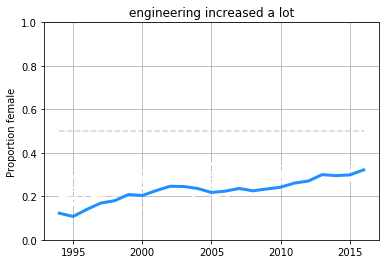

In [36]:
_, ax = plt.subplots()
plot_peer_proportions(ax, E_TOTALS, 'engineering increased a lot', peer_color='white',
                      highlight_color='dodgerblue')

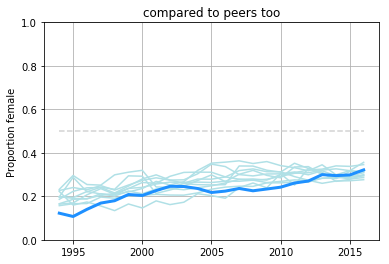

In [37]:
_, ax = plt.subplots()
plot_peer_proportions(ax, E_TOTALS, 'compared to peers too', peer_color='powderblue', 
                      highlight_color='dodgerblue')

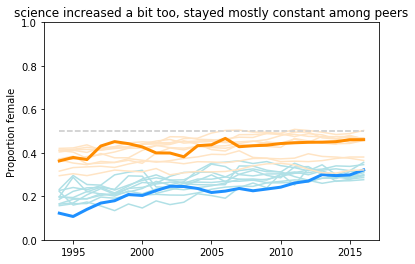

In [41]:
_, ax = plt.subplots()
plot_peer_proportions(ax, E_TOTALS, '', peer_color='powderblue', highlight_color='dodgerblue')
plot_peer_proportions(ax, S_TOTALS, 'science increased a bit too, stayed mostly constant among peers',
                      peer_color='bisque', highlight_color='darkorange')

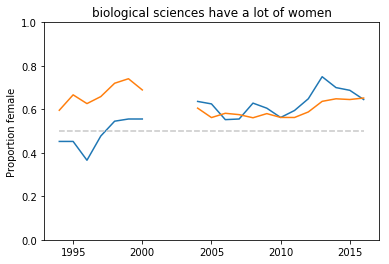

In [39]:
_, ax = plt.subplots()
plot_proportions(ax, '', 'Science', 'Genetics')
plot_proportions(ax, 'biological sciences have a lot of women', 'Science', 'Biometry and epidemiology')

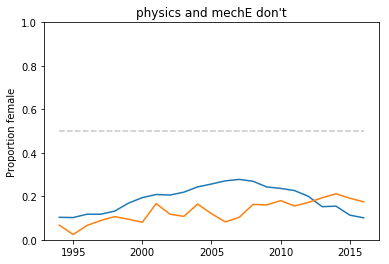

In [47]:
_, ax = plt.subplots()
plot_proportions(ax, '', 'Science', 'Physics')
plot_proportions(ax, 'physics and mechE don\'t', 'Engineering', 'Mechanical engineering')

In [53]:
data = {
    'disciplines': {
        'Science': {inst: get_total_proportions(S_TOTALS, inst) for inst in institutions},
        'Engineering': {inst: get_total_proportions(E_TOTALS, inst) for inst in institutions},
    },
    'detailed_fields': {}
}

for field in fields['Science']:
    data['detailed_fields'][field] = get_proportions('Science', field)
for field in fields['Engineering']:
    data['detailed_fields'][field] = get_proportions('Engineering', field)
with open('data.json', 'w') as out:
    json.dump(data, out)